In [1]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

# Assignment


## 1. change the `encoding_dim` through various values (`range(2,18,2)` and save the loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [2]:
#Define 'dimensions' using np.arange
dimensions = np.arange(2, 18, 2)
dimensions

array([ 2,  4,  6,  8, 10, 12, 14, 16])

In [3]:
losses = []

for encoding_dim in dimensions:
    
    # generate encoding layers 
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)

    # generate decoding layers
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # define autoencoder (encoder and decoder is not needed in this cell)
    autoencoder = Model(input_img, decoded)
    
    # Compile autoendoder
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    # Fit autoencoder
    autoencoder.fit(xtrain, xtrain,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))

    # Calculate loss
    loss = autoencoder.evaluate(xtest, xtest)
    losses.append(loss)



Epoch 1/20

235/235 [==============================] - 9s 27ms/step - loss: 0.2709 - val_loss: 0.2296
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.2209 - val_loss: 0.2132
Epoch 3/20
235/235 [==============================] - 4s 18ms/step - loss: 0.2107 - val_loss: 0.2076
Epoch 4/20
235/235 [==============================] - 4s 17ms/step - loss: 0.2053 - val_loss: 0.2032
Epoch 5/20
235/235 [==============================] - 4s 18ms/step - loss: 0.2009 - val_loss: 0.1991
Epoch 6/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1969 - val_loss: 0.1948
Epoch 7/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1931 - val_loss: 0.1914
Epoch 8/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1901 - val_loss: 0.1892
Epoch 9/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1880 - val_loss: 0.1875
Epoch 10/20
235/235 [==============================] - 5s 19ms/step - loss: 0.1863 - val

235/235 [==============================] - 4s 17ms/step - loss: 0.1245 - val_loss: 0.1242
Epoch 14/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1238 - val_loss: 0.1238
Epoch 15/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1232 - val_loss: 0.1229
Epoch 16/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1226 - val_loss: 0.1225
Epoch 17/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1221 - val_loss: 0.1223
Epoch 18/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1216 - val_loss: 0.1220
Epoch 19/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1212 - val_loss: 0.1215
Epoch 20/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1212
Epoch 1/20
235/235 [==============================] - 8s 24ms/step - loss: 0.2545 - val_loss: 0.1856
Epoch 2/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1723 - val_loss: 0.1599
Epoch 3/20
235

235/235 [==============================] - 4s 17ms/step - loss: 0.1029 - val_loss: 0.1018
Epoch 12/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1021 - val_loss: 0.1013
Epoch 13/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1013 - val_loss: 0.1007
Epoch 14/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1005 - val_loss: 0.1000
Epoch 15/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1000 - val_loss: 0.0996
Epoch 16/20
235/235 [==============================] - 4s 19ms/step - loss: 0.0994 - val_loss: 0.0986
Epoch 17/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0988 - val_loss: 0.0985
Epoch 18/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0983 - val_loss: 0.0983
Epoch 19/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0978 - val_loss: 0.0978
Epoch 20/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0974


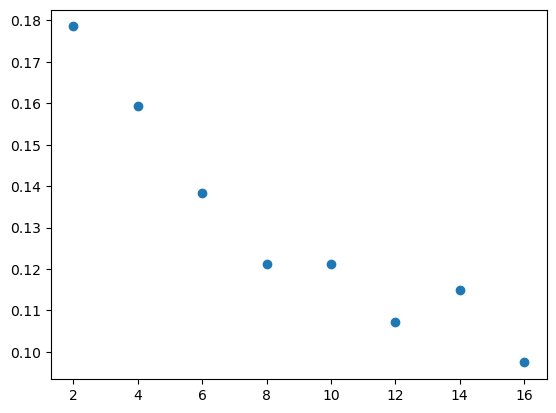

In [4]:
#Plot dimensions vs losses 
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(dimensions, losses)

### Result : losses decline as dimension increases

## 2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [5]:
#Train autoencoder with encoding_dim= 8

encoding_dim = 8  

# generate encoding layers 
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

# generate decoding layers 
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# define autoencoder
autoencoder = Model(input_img, decoded)

# define encoder
encoder = Model(input_img, encoded)

# define decoder
encoded_input = Input(shape=(encoding_dim,))
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [6]:
#Compile autoendoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
#Fit autoencoder
autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))

Epoch 1/50
235/235 [==============================] - 15s 20ms/step - loss: 0.2534 - val_loss: 0.1921
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1823 - val_loss: 0.1730
Epoch 3/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1688 - val_loss: 0.1613
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1542 - val_loss: 0.1443
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1409 - val_loss: 0.1346
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1328 - val_loss: 0.1296
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1289 - val_loss: 0.1272
Epoch 8/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1264 - val_loss: 0.1250
Epoch 9/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1243 - val_loss: 0.1229
Epoch 10/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1227 - val_l

In [7]:
#Add noise to test set (xtest2)
noise_test = np.random.normal(0.5, 0.5, (10000, 784))
xtest2 = xtest + noise_test

313/313 [==============================] - 1s 2ms/step


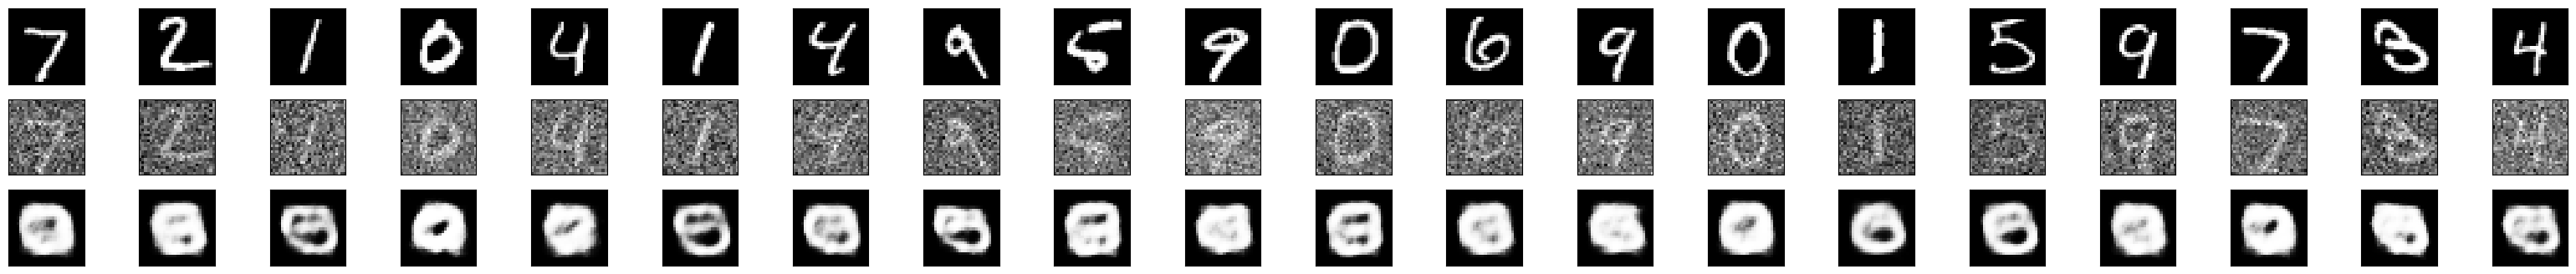

In [8]:
#Set input values as noised value
encoded_imgs = encoder.predict(xtest2)
decoded_imgs = decoder.predict(encoded_imgs)

# display outputs
n = 20  
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original test value
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noised test values(input value) 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(xtest2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output value
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Result: output images(third row) do not have noises, but not able to distinguishable